In [1]:
import numpy as np

In [2]:
def hypergraph_product(A, B):
  mA, mB = A.shape[0], B.shape[0]
  nA, nB = A.shape[1], B.shape[1]

  #H_X parity check matrix construction
  HX_left = np.kron(A, np.eye(mB))
  HX_right = np.kron(np.eye(mA), B)
  HX = np.hstack((HX_left, HX_right))

  #H_Z parity check matrix construction
  HZ_left = np.kron(np.eye(nA), B.T)
  HZ_right = np.kron(A.T, np.eye(nB))
  HZ = np.hstack((HZ_left, HZ_right))

  #CSS condition checking
  H_ = np.dot(HX, HZ.T)
  if np.all((H_ % 2) == 0):
    return HX, HZ
  else:
    print('CSS condition not satisfied')
    return None, None

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_css_tanner_three_layer(Hx, Hz, node_size=100):
    mx, n = Hx.shape
    mz, nz = Hz.shape
    assert n == nz, "Hx and Hz must have same number of columns (qubits)"

    G = nx.Graph()

    bit_nodes = [f'Q{i}' for i in range(n)]
    x_check_nodes = [f'Xc{j}' for j in range(mx)]
    z_check_nodes = [f'Zc{j}' for j in range(mz)]

    G.add_nodes_from(bit_nodes, bipartite=1)
    G.add_nodes_from(x_check_nodes, bipartite=0)
    G.add_nodes_from(z_check_nodes, bipartite=2)

    # Add edges for X checks
    for j in range(mx):
        for i in range(n):
            if Hx[j, i] == 1:
                G.add_edge(f'Xc{j}', f'Q{i}')

    # Add edges for Z checks
    for j in range(mz):
        for i in range(n):
            if Hz[j, i] == 1:
                G.add_edge(f'Q{i}', f'Zc{j}')

    # Layout positions:
    spacing = max(mx, mz, n)
    pos = dict()

    # Left side: X checks
    for index, node in enumerate(x_check_nodes):
        pos[node] = (-1, spacing - index * (2 if spacing > 20 else 1))

    # Middle: Bit nodes
    for index, node in enumerate(bit_nodes):
        pos[node] = (0, spacing - index * (2 if spacing > 20 else 1))

    # Right side: Z checks
    for index, node in enumerate(z_check_nodes):
        pos[node] = (1, spacing - index * (2 if spacing > 20 else 1))

    # Color coding
    color_map = []
    for node in G.nodes():
        if node.startswith('Q'):
            color_map.append('lightblue')  # Bits
        elif node.startswith('Xc'):
            color_map.append('green')  # X checks
        elif node.startswith('Zc'):
            color_map.append('coral')  # Z checks

    plt.figure(figsize=(4, 5))  # Dynamic figure size

    nx.draw(G, pos, with_labels=True, node_color=color_map,
            node_size=node_size, edge_color='gray', font_size=8)

    #plt.title("QLDPC Tanner Graph on left X checks and on right Z checks and bits in the middle")
    plt.axis('off')
    plt.show()

In [4]:
A = np.array([[1,1],[0,1]])
B = np.array([[1,0,1],[0,1,1]])

In [5]:
Hx, Hz = hypergraph_product(A, B)

In [6]:
Hx

array([[1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 1.]])

In [7]:
Hz

array([[1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1.]])

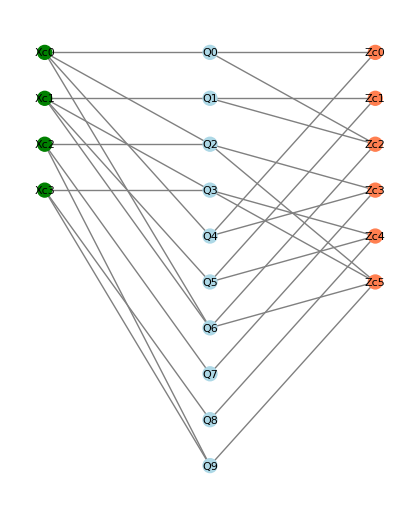

In [16]:
plot_css_tanner_three_layer(Hx, Hz)